# Plotting

In [1]:
import numpy as np
import pandas as pd

import folium
import geopandas
import contextily
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from src.import_data import import_data

For the scope of this tutorial we are going to use AirBnb Scraped data for the city of Bologna. The data is freely available at **Inside AirBnb**: http://insideairbnb.com/get-the-data.html.

A description of all variables in all datasets is avaliable [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896).

We are going to use 2 datasets:

- listing dataset: contains listing-level information
- pricing dataset: contains pricing data, over time

We import and clean them with a script. If you want more details, have a look at the data exploration and data wrangling sections.

In [2]:
df_listings, df_prices, df = import_data()

## Intro

The default library for plotting in python is `matplotlib`. However, a more modern package that builds on top of it, is `seaborn`.

We start by setting the theme and by telling the notebook to display the plots inline.

In [3]:
sns.set()
%matplotlib inline

We can set some global paramters for all plots. You can find a list of all the options [here](https://matplotlib.org/stable/tutorials/introductory/customizing.html). If you want to customize all plots in a project in the samy way, you can create a `filename.mplstyle` file and call it at the beginning of each file as `plt.style.use('filename.mplstyle')`.

In [4]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['axes.titlepad'] = 20
mpl.rcParams['legend.facecolor'] = 'w'

## Distributions

Suppose you have a numerical variable and you want to see how it's distributed. The best option is to use an **histogram**. Seaborn function is `sns.histplot`.

In [5]:
df_listings['log_price'] = np.log(1+df_listings['mean_price'])

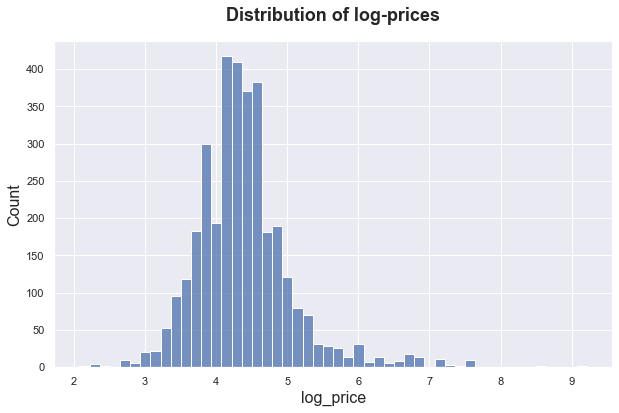

In [6]:
sns.histplot(df_listings['log_price'], bins=50)\
.set(title='Distribution of log-prices');

We can add a smooth kernel density approximation with the `kde` option.

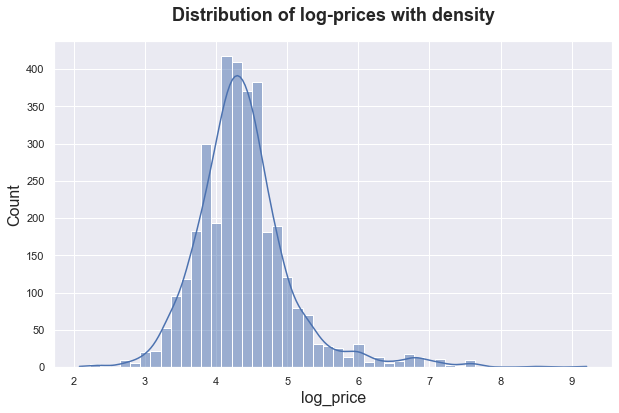

In [7]:
sns.histplot(df_listings['log_price'], bins=50, kde=True)\
.set(title='Distribution of log-prices with density');

If we have a categorical variable, we might want to plot the distribution of the data across its values. We can use a **barplot**. Seaborn function is `sns.countplot()` for count data.

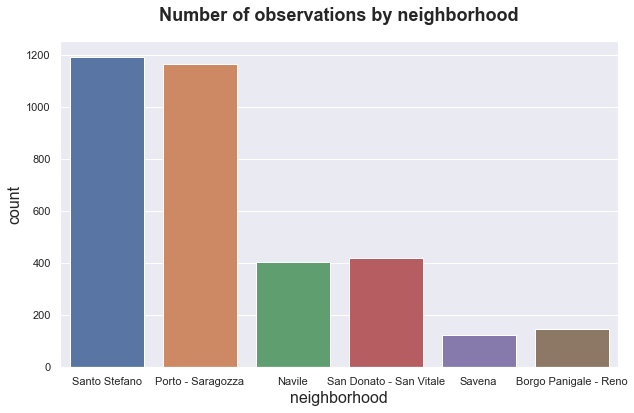

In [8]:
sns.countplot(x="neighborhood", data=df_listings)\
.set(title='Number of observations by neighborhood');

If instead we want to see the distribution of another variable across some group, we can use the `sns.barplot()` function.

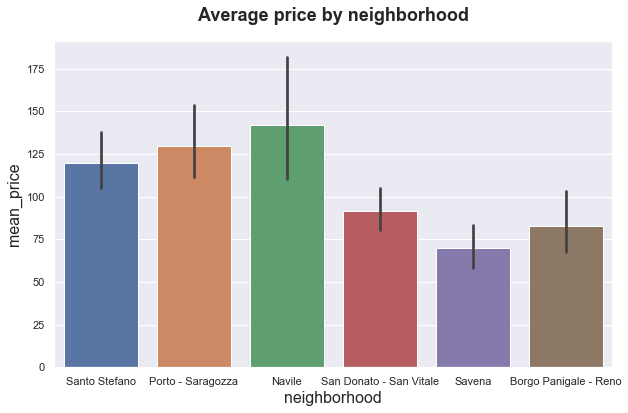

In [9]:
sns.barplot(x="neighborhood", y="mean_price", data=df_listings)\
.set(title='Average price by neighborhood');

We can also use other metrics besides the mean with the `estimator` option.

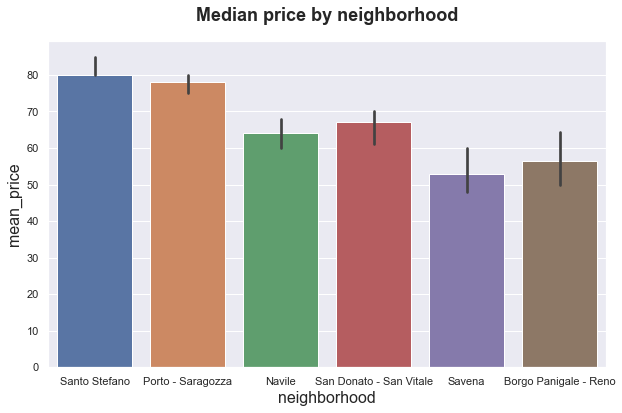

In [10]:
sns.barplot(x="neighborhood", y="mean_price", data=df_listings, estimator=np.median)\
.set(title='Median price by neighborhood');

We can also plot the full distribution using, for example **boxplots** with `sns.boxplot()`. Boxplots display quartiles and outliers.

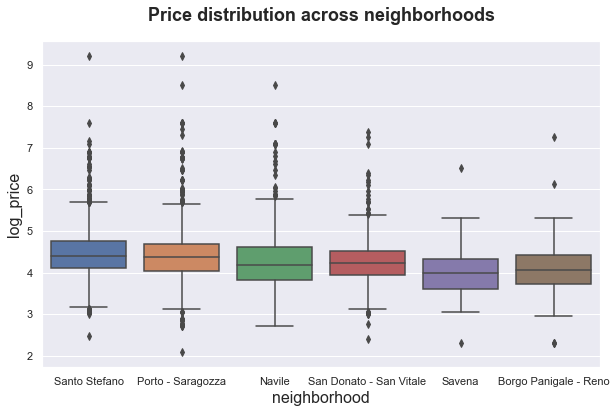

In [11]:
sns.boxplot(x="neighborhood", y="log_price", data=df_listings)\
.set(title='Price distribution across neighborhoods');

If we want to see the full distribution, we can use the `sns.violinplot()` function.

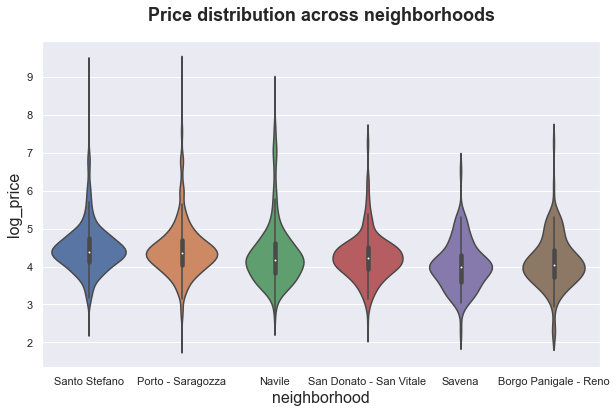

In [12]:
sns.violinplot(x="neighborhood", y="log_price", data=df_listings)\
.set(title='Price distribution across neighborhoods');

## Time Series

If the dataset has a time dimension, we might want to explore how a variable evolves over time. Seaborn function is `sns.lineplot()`. If the data has multiple observations for each time period, it will also display a 95% confidence interval around the mean.

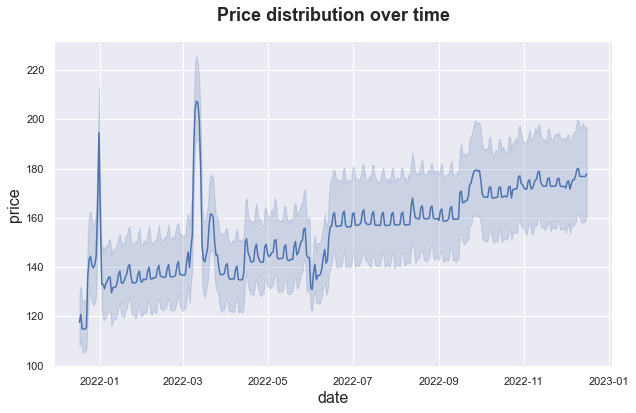

In [13]:
sns.lineplot(data=df, x='date', y='price')\
.set(title="Price distribution over time");

We can do the samy by group, with the `hue` option. We can suppress confidence intervals setting `ci=None` (making the code much faster).

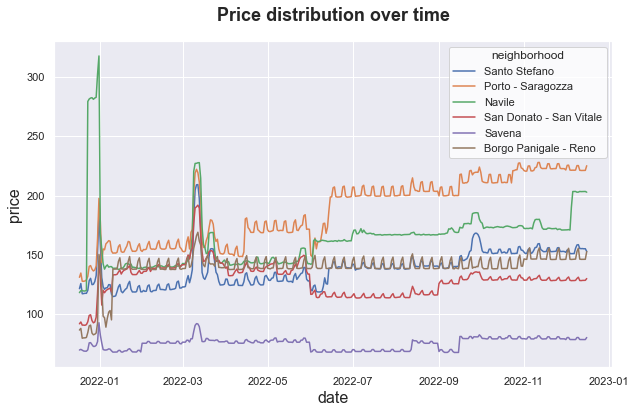

In [14]:
sns.lineplot(data=df, x='date', y='price', hue='neighborhood', ci=None)\
.set(title="Price distribution over time");

## Correlations

In [15]:
df_listings["log_reviews"] = np.log(1 + df_listings["number_of_reviews"])
df_listings["log_rpm"] = np.log(1 + df_listings["reviews_per_month"])

The most intuitive way to plot a correlation between two variables is a **scatterplot**. Seaborn function is `sns.scatterplot()`

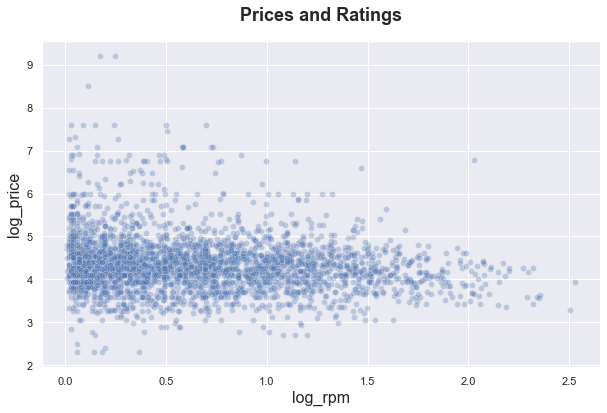

In [16]:
sns.scatterplot(data=df_listings, x="log_rpm", y="log_price", alpha=0.3)\
.set(title='Prices and Ratings');

As usual, we can split the data by group with the `hue` option.

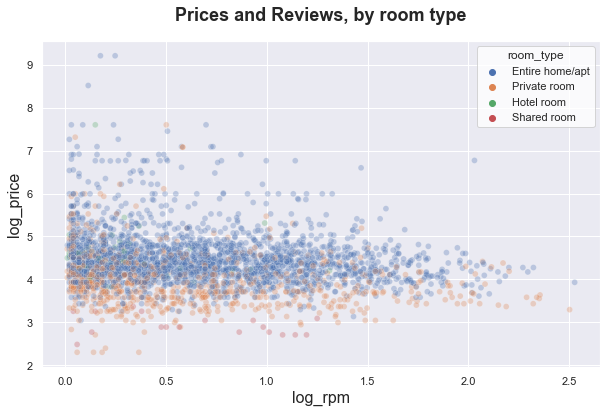

In [17]:
sns.scatterplot(data=df_listings, x="log_rpm", y="log_price", 
                hue="room_type", alpha=0.3)\
.set(title="Prices and Reviews, by room type");

We can also add the marginal distributions using the `sns.jointplot()` function.

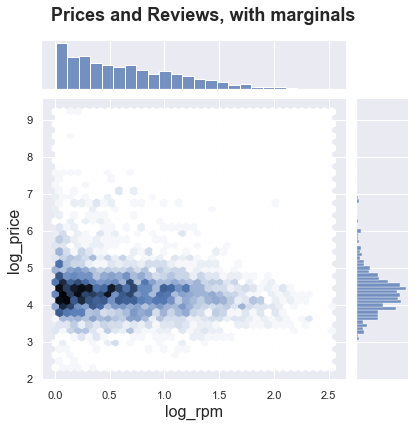

In [18]:
sns.jointplot(data=df_listings, x="log_rpm", y="log_price", kind="hex")\
.fig.suptitle("Prices and Reviews, with marginals")  
plt.subplots_adjust(top=0.9);

If we want to plot correlations (and marginals) of multiple variables, we can use the `sns.pairplot()` function.

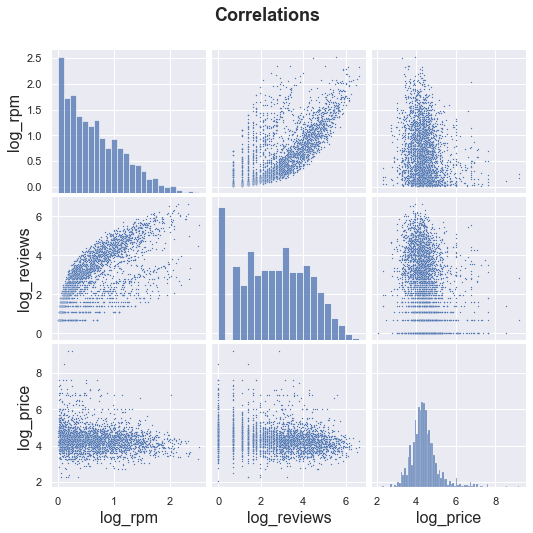

In [19]:
sns.pairplot(data=df_listings,
             vars=["log_rpm", "log_reviews", "log_price"],
             plot_kws={'s':2})\
.fig.suptitle("Correlations");
plt.subplots_adjust(top=0.9)

We can distinguish across groups with the `hue` option.

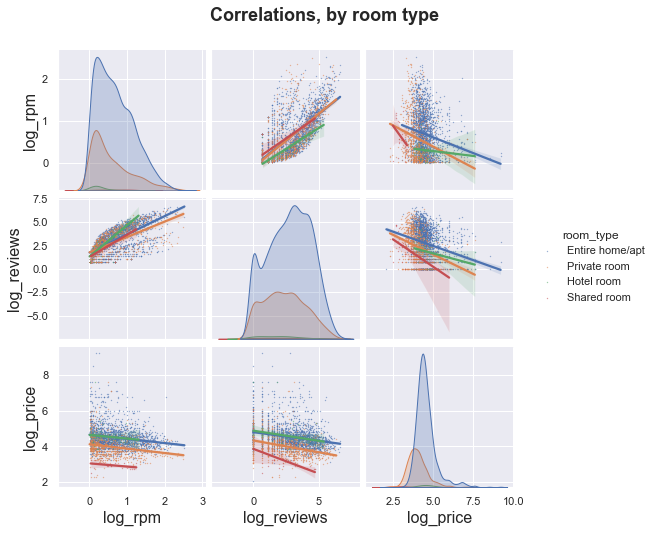

In [20]:
sns.pairplot(data=df_listings,
             vars=["log_rpm", "log_reviews", "log_price"],
             kind="reg",
             hue='room_type',
             plot_kws={'scatter_kws':{'s':.1}})\
.fig.suptitle("Correlations, by room type");
plt.subplots_adjust(top=0.9)

If we want to plot all the correlations in the data, we can use the `sns.relplot()` function together with a correlation matrix.

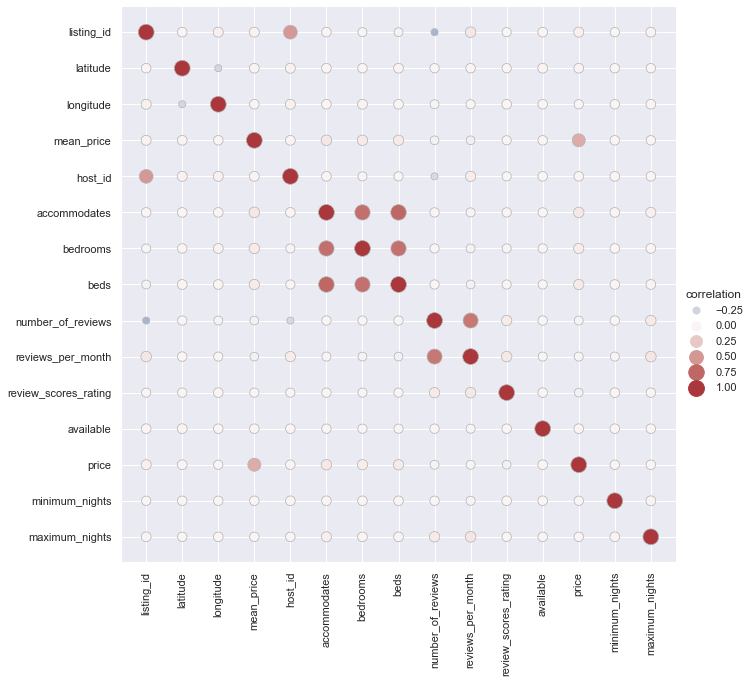

In [21]:
# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(data=corr_mat,
            x="level_0", y="level_1", hue="correlation", size="correlation",
            palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
            height=10, sizes=(50, 250), size_norm=(-.2, .8));

# Extra cleaning
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
g.set(xlabel="", ylabel="", aspect="equal");

For univariate linear regression, we can display data, best fit and uncertainty in the same plot using `sns.regplot()`.

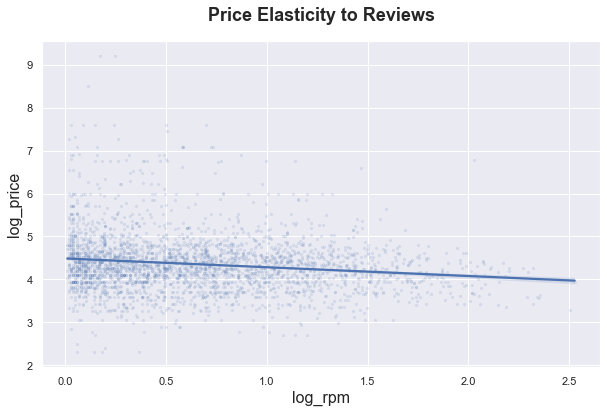

In [22]:
sns.regplot(x="log_rpm", y="log_price", data=df_listings,
            scatter_kws={'s':5, 'alpha':.1})\
.set(title='Price Elasticity to Reviews');

## Geographical data

We can in principle plot geographical data as a simple scatterplot.

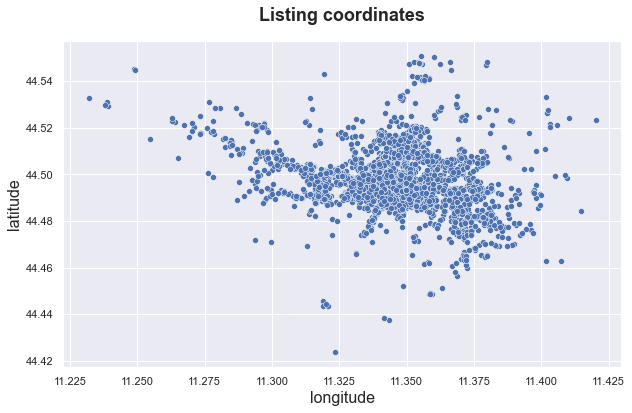

In [23]:
sns.scatterplot(data=df_listings, x="longitude", y="latitude")\
.set(title='Listing coordinates');

However, we can do better and do the scatterplot over a map layer.

First, we neeed to convert the `latitude` and `longitude` variables into coordinates. We use the library `geopandas`. Note that the original coordinate system is `4326` (3D) and we need to `3857` (2D).

In [24]:
geom = geopandas.points_from_xy(df_listings.longitude, df_listings.latitude)
gdf = geopandas.GeoDataFrame(
    df_listings, 
    geometry=geom,
    crs=4326).to_crs(3857)

We import a map of Bologna using the library `contextily`.

In [25]:
bologna = contextily.Place("Bologna", source=contextily.providers.Stamen.TonerLite)

We are now ready to plot it with the airbnb listings.

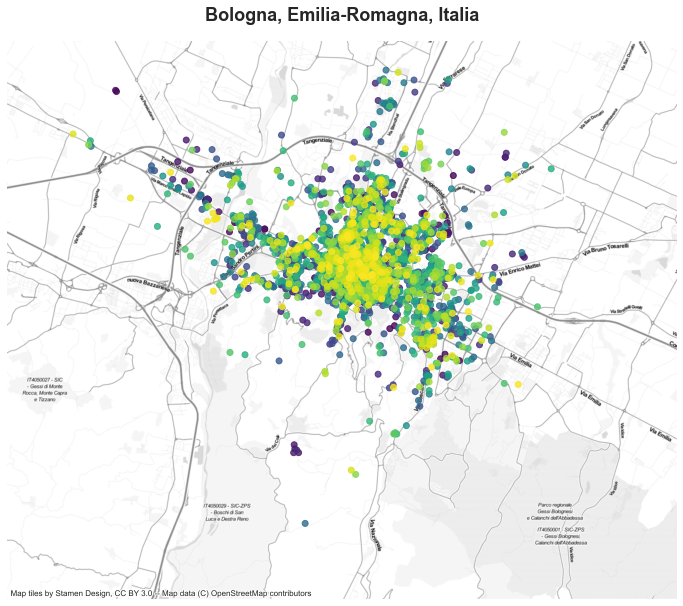

In [26]:
ax = bologna.plot()
gdf.plot(ax=ax, c=df_listings['mean_price'], cmap='viridis', alpha=0.8);